In [1]:
%matplotlib inline
import pandas as pd
from fbprophet import Prophet

import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [2]:
#read in .csv file, as a data frame, and print n lines
df = pd.read_csv('./data/AirPassengers.csv')
df.head(5)

,Month,AirPassengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [3]:
#our data frame has months and AirPassangers -> prophet expects one column = time & one column = forecast
#time NEEDS to be in datetime type, check to make sure
df.dtypes

Month            object
AirPassengers     int64
dtype: object

In [4]:
#change output to match datetime & check again
df['Month'] = pd.DatetimeIndex(df['Month'])
df.dtypes

Month            datetime64[ns]
AirPassengers             int64
dtype: object

In [5]:
#prophet is tricky when it comes to column names so we will name as the following
# time column -> ds  metric column -> y
df = df.rename(columns={'Month': 'ds','AirPassengers': 'y'})
df.head(5)

,ds,y
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


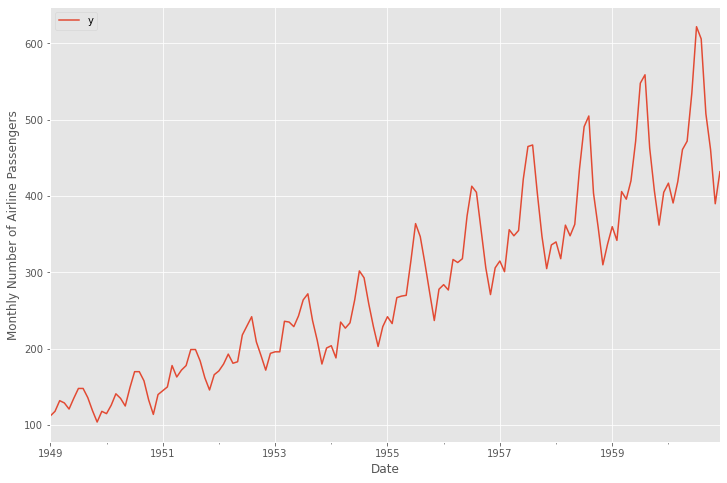

In [6]:
#plot the current data
ax = df.set_index('ds').plot(figsize=(12, 8))
ax.set_ylabel('Monthly Number of Airline Passengers')
ax.set_xlabel('Date')
plt.show()

In [7]:
#instantiate a new Prophet model
#can specify a number of arguements ex. uncertainty interva
m = Prophet(interval_width=0.95)

In [8]:
#fit the new model to the dataframe we included
m.fit(df)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [9]:
#Prophet requires new Date Frame containing a ds column, used for future dates to predict -> use helper function
#here we are generating 36 new 'timestamps' generated at freq = month start .. essenstially a 3 year prediction
future_dates = m.make_future_dataframe(periods=36, freq='MS')
future_dates.tail()

,ds
175,1963-08-01
176,1963-09-01
177,1963-10-01
178,1963-11-01
179,1963-12-01


In [10]:
#the future dataframe is fed into the prediction method of fitted model
#yhat is a Prophet thing.. havent had time to look to far into why this syntax is what it is 
#ds=datestamp, yhat=forecasted_value, yhat_lower=lower.bound, yhat_upper=upper.bound (of forecast)
forecast = m.predict(future_dates)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
175,1963-08-01,650.059659,605.961642,691.070669
176,1963-09-01,602.755802,557.781214,648.697588
177,1963-10-01,566.569663,518.962598,613.399963
178,1963-11-01,534.733242,489.886252,578.303979
179,1963-12-01,564.363327,520.356734,607.819856


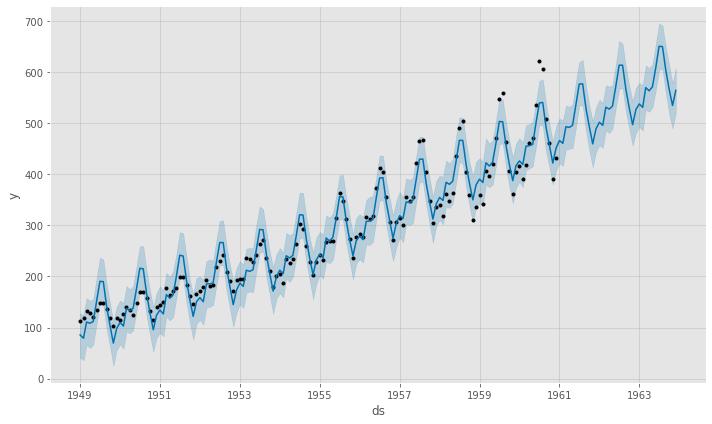

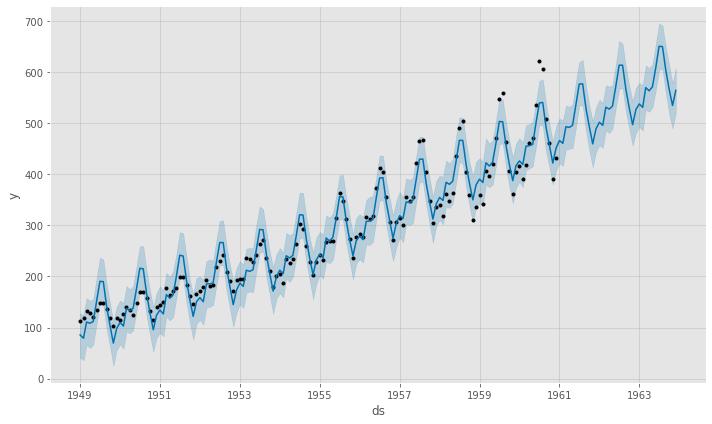

In [11]:
#can plot the results of our forecast
#black dots->observed values, blue line->forecasted value, shade->uncertainty
m.plot(forecast, uncertainty=True)

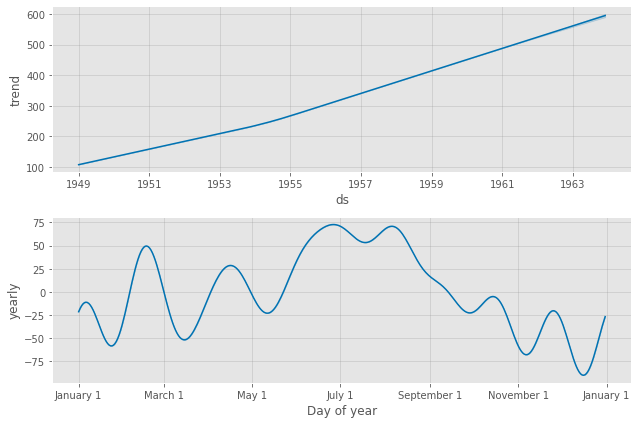

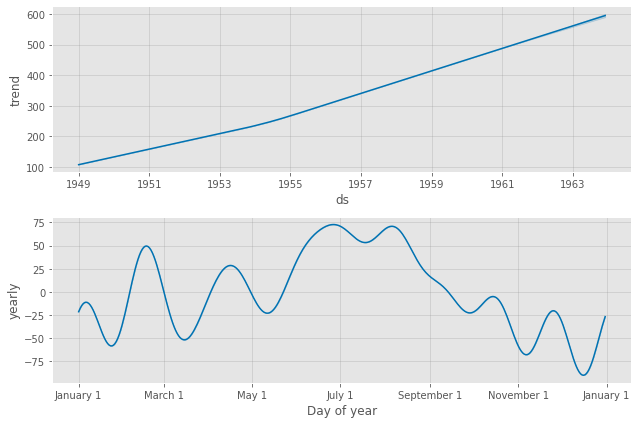

In [12]:
#can also display the components of the forecast, more trends to analysize (daily, weekly, yearly depending on data)
m.plot_components(forecast)